# Does a County's Metropolitan Status Impact the Susceptibility to Depression/Mental Health Issues among Individuals age 18 and above in the United States? 

## Introduction

**Specific Problem.** [to be inserted]

**Analytical COntext.** [to be inserted]

The Statistical Analysis jupyter notebook will proceed as follows: we will (1) explore the relationship of available features with the interested outcome variable (Any_Mental_Illness_Indicator_Past_Year) using logistic regression; (2) discuss feature engineering (if applicable/need); (3) Bivariate Analysis using Chi-Square/Regression; and (4) Multivariate Analysis with Feature Selection (Forward/Backward/Mixed/other methods) to study the importance of other features in relation to our interested outcome variable.

**Hypothesis**
H_0: Metropolitan Status and Susceptibility to Mental Health Issues are independent
H_A: Metropolitan Status and Susceptibility to Mental Health Issues are not independent

In [54]:
# import libraries we will be using:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import pingouin
%matplotlib inline
import statsmodels.api as sm

# Adjust notebook settings to widen the notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:85% !important;}</style>"))
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [16]:
df = pd.read_csv("./Data/nsduh_data_cleaned.csv")
df.head(2)

,Unnamed: 0,Id,Year,Inpatient_Past_Year,Outpatient_Past_Year,Prescription_Treatment_Past_Year,Any_Treatment_Past_Year,Treatment_Type_Past_Year,Perceived_Unmet_Need,Received_Treatment_At_Clinic_Or_Center,Received_Treatment_At_Private_Therapist,Received_Treatment_At_NonClinic_Doctor,Received_Treatment_At_Medical_Clinic,Received_Treatment_At_Day_Hospital,Received_Treatment_At_School,Received_Treatment_Other,Self_Paid,Non_Household_Member_Paid,Private_Health_Insurance_Paid,Medicare_Paid,Medicaid_Paid,Rehab_Paid,Employer_Paid,Military_Paid,Other_Public_Source_Paid,Other_Private_Source_Paid,Nobody_Paid,No_Treatment_Could_Not_Afford,No_Treatment_Feared_Neighbors_Opinion,No_Treatment_Feared_Effect_On_Job,No_Treatment_Insurance_Not_Covered,No_Treatment_Insurance_Not_Covered_Enough,No_Treatment_Where_To_Go,No_Treatment_Confidentiality_Concerns,No_Treatment_Fear_Of_Being_Committed,No_Treatment_Didnt_Think_Needed,No_Treatment_Handle_Problem_Without,No_Treatment_Didnt_Think_Would_Help,No_Treatment_Didnt_Have_Time,No_Treatment_Didnt_Want_Others_To_Know,No_Treatment_No_Transport_Inconvenient,No_Treatment_Other,Num_Weeks_Mental_Health_Difficulties,Num_Days_Past_Year_Unable_To_Work,Serious_Psychological_Distress_Indicator_Past_Month,Psychological_Distress_Level_Worst_Month,Worst_Psychological_Distress_Level,Serious_Psychological_Distress_Indicator_Past_Year,Serious_Suicidal_Thoughts_Past_Year,Suicide_Plan_Past_Year,Suicide_Attempt_Past_Year,Serious_Or_Moderate_Mental_Illness_Indicator_Past_Year,Moderate_Mental_Illness_Indicator_Past_Year,Mild_Mental_Illness_Indicator_Past_Year,Low_Or_Moderate_Mental_Illness_Indicator_Past_Year,Categorical_Mental_Illness_Indicator,Serious_Mental_Illness_And_Substance_Abuse,Any_Mental_Illness_And_Substance_Abuse,Low_Or_Moderate_Mental_Illness_And_Substance_Abuse,Adult_Lifetime_Major_Depressive_Episode,Adult_Past_Year_Major_Depressive_Episode,Adult_Received_Counseling_Or_Meds_For_Depressive_Feelings_Past_Year,Gender,Age_Category,Age_Category_Two_Levels,Age_Category_Three_Levels,Age_Category_Six_Levels,Gender_Age_Category,Race_Ethnicity,Race_Sex,Education_Category,Overall_Health,Work_Situation_Past_Week,Num_Days_Skipped_Work_Past_30_Days,EAP_Offered,Adult_Employment_Status,Has_Medicare,Has_Medicaid_Or_CHIP,Has_Military_Benefit,Has_Private_Health_Insurance,Has_Other_Health_Insurance,Covered_By_Any_Health_Insurance,Covered_By_Any_Health_Insurance_Imputation_Revised,Family_Receives_Social_Security,Family_Receives_SSI,Family_Receives_Food_Stamps,Family_Receives_Public_Assistance,Family_Receives_Welfare_JobPlacement_Childcare,Months_On_Welfare,Total_Income_Respondent,Total_Income_Family,Participated_In_One_Or_More_Government_Assistance_Programs,Total_Income_Family_Recode,Poverty_Level,PDEN10,County_Metro_NonMetro_Status
0,1,13005143,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,4,3,4,4,5,7,5,2,1,1,0,0,1,0,1,0,0,-1,1,1,0,0,1,0,1,1,2,4,1,2,2,2,2
1,2,67415143,2015,0,1,1,1,6,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,0,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,3,3,3,3,5,1,2,4,2,7,0,-1,4,0,0,0,1,-1,1,1,0,0,0,0,0,0,1,1,0,1,1,2,3


In [17]:
df.columns

Index(['Unnamed: 0', 'Id', 'Year', 'Inpatient_Past_Year',
       'Outpatient_Past_Year', 'Prescription_Treatment_Past_Year',
       'Any_Treatment_Past_Year', 'Treatment_Type_Past_Year',
       'Perceived_Unmet_Need', 'Received_Treatment_At_Clinic_Or_Center',
       'Received_Treatment_At_Private_Therapist',
       'Received_Treatment_At_NonClinic_Doctor',
       'Received_Treatment_At_Medical_Clinic',
       'Received_Treatment_At_Day_Hospital', 'Received_Treatment_At_School',
       'Received_Treatment_Other', 'Self_Paid', 'Non_Household_Member_Paid',
       'Private_Health_Insurance_Paid', 'Medicare_Paid', 'Medicaid_Paid',
       'Rehab_Paid', 'Employer_Paid', 'Military_Paid',
       'Other_Public_Source_Paid', 'Other_Private_Source_Paid', 'Nobody_Paid',
       'No_Treatment_Could_Not_Afford',
       'No_Treatment_Feared_Neighbors_Opinion',
       'No_Treatment_Feared_Effect_On_Job',
       'No_Treatment_Insurance_Not_Covered',
       'No_Treatment_Insurance_Not_Covered_Enough', 'No

In [18]:
# read in the data
df = pd.read_csv("./Data/nsduh_data_cleaned.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
print('NSDUH Data Shape: {}'.format(df.shape))

X = df.drop(['Serious_Psychological_Distress_Indicator_Past_Month', 'Id'], axis=1) # independent variables data
y = df['Serious_Psychological_Distress_Indicator_Past_Month']  # dependent variable data

X.shape, y.shape # print X and y's data shape

NSDUH Data Shape: (214505, 95)


((214505, 93), (214505,))

In [19]:
df.head()

,Id,Year,Inpatient_Past_Year,Outpatient_Past_Year,Prescription_Treatment_Past_Year,Any_Treatment_Past_Year,Treatment_Type_Past_Year,Perceived_Unmet_Need,Received_Treatment_At_Clinic_Or_Center,Received_Treatment_At_Private_Therapist,Received_Treatment_At_NonClinic_Doctor,Received_Treatment_At_Medical_Clinic,Received_Treatment_At_Day_Hospital,Received_Treatment_At_School,Received_Treatment_Other,Self_Paid,Non_Household_Member_Paid,Private_Health_Insurance_Paid,Medicare_Paid,Medicaid_Paid,Rehab_Paid,Employer_Paid,Military_Paid,Other_Public_Source_Paid,Other_Private_Source_Paid,Nobody_Paid,No_Treatment_Could_Not_Afford,No_Treatment_Feared_Neighbors_Opinion,No_Treatment_Feared_Effect_On_Job,No_Treatment_Insurance_Not_Covered,No_Treatment_Insurance_Not_Covered_Enough,No_Treatment_Where_To_Go,No_Treatment_Confidentiality_Concerns,No_Treatment_Fear_Of_Being_Committed,No_Treatment_Didnt_Think_Needed,No_Treatment_Handle_Problem_Without,No_Treatment_Didnt_Think_Would_Help,No_Treatment_Didnt_Have_Time,No_Treatment_Didnt_Want_Others_To_Know,No_Treatment_No_Transport_Inconvenient,No_Treatment_Other,Num_Weeks_Mental_Health_Difficulties,Num_Days_Past_Year_Unable_To_Work,Serious_Psychological_Distress_Indicator_Past_Month,Psychological_Distress_Level_Worst_Month,Worst_Psychological_Distress_Level,Serious_Psychological_Distress_Indicator_Past_Year,Serious_Suicidal_Thoughts_Past_Year,Suicide_Plan_Past_Year,Suicide_Attempt_Past_Year,Serious_Or_Moderate_Mental_Illness_Indicator_Past_Year,Moderate_Mental_Illness_Indicator_Past_Year,Mild_Mental_Illness_Indicator_Past_Year,Low_Or_Moderate_Mental_Illness_Indicator_Past_Year,Categorical_Mental_Illness_Indicator,Serious_Mental_Illness_And_Substance_Abuse,Any_Mental_Illness_And_Substance_Abuse,Low_Or_Moderate_Mental_Illness_And_Substance_Abuse,Adult_Lifetime_Major_Depressive_Episode,Adult_Past_Year_Major_Depressive_Episode,Adult_Received_Counseling_Or_Meds_For_Depressive_Feelings_Past_Year,Gender,Age_Category,Age_Category_Two_Levels,Age_Category_Three_Levels,Age_Category_Six_Levels,Gender_Age_Category,Race_Ethnicity,Race_Sex,Education_Category,Overall_Health,Work_Situation_Past_Week,Num_Days_Skipped_Work_Past_30_Days,EAP_Offered,Adult_Employment_Status,Has_Medicare,Has_Medicaid_Or_CHIP,Has_Military_Benefit,Has_Private_Health_Insurance,Has_Other_Health_Insurance,Covered_By_Any_Health_Insurance,Covered_By_Any_Health_Insurance_Imputation_Revised,Family_Receives_Social_Security,Family_Receives_SSI,Family_Receives_Food_Stamps,Family_Receives_Public_Assistance,Family_Receives_Welfare_JobPlacement_Childcare,Months_On_Welfare,Total_Income_Respondent,Total_Income_Family,Participated_In_One_Or_More_Government_Assistance_Programs,Total_Income_Family_Recode,Poverty_Level,PDEN10,County_Metro_NonMetro_Status
0,13005143,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,4,3,4,4,5,7,5,2,1,1,0,0,1,0,1,0,0,-1,1,1,0,0,1,0,1,1,2,4,1,2,2,2,2
1,67415143,2015,0,1,1,1,6,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,0,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,3,3,3,3,5,1,2,4,2,7,0,-1,4,0,0,0,1,-1,1,1,0,0,0,0,0,0,1,1,0,1,1,2,3
2,75235143,2015,0,1,1,1,6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,6,0,-1,11,0,0,0,0,0,0,1,1,1,0,0,0,0,0,-1,2,2,2,2,2,4,1,2,3,3,6,0,-1,4,0,0,0,1,-1,1,1,0,0,0,0,0,0,1,2,0,1,1,3,3
3,47745143,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1,8,0,0,0,0,0,0,1,1,1,0,0,0,0,0,-1,1,2,2,2,2,3,5,7,3,3,7,0,-1,4,0,0,0,1,-1,1,1,0,0,0,0,0,0,1,1,0,1,1,1,1
4,33145143,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,2,2,2,2,3,7,5,2,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,2,3,2,2


In [20]:
df["Serious_Psychological_Distress_Indicator_Past_Month"].value_counts()

0    197059
1     17446
Name: Serious_Psychological_Distress_Indicator_Past_Month, dtype: int64

Target class has two classes: 
* 1 (Has indication of serious psychological distress indicator past month) = 17,446 people
* 0 (Has no indication of serious psychological distress indicator past month) = 197,059 people

# Bivariate Analysis

In [21]:
df_contingency_table = pd.crosstab(index=df["Serious_Psychological_Distress_Indicator_Past_Month"], columns=df["County_Metro_NonMetro_Status"], normalize="columns")*100
df_contingency_table

County_Metro_NonMetro_Status,1,2,3
Serious_Psychological_Distress_Indicator_Past_Month,,,
0,92.286855,91.584962,91.40837
1,7.713145,8.415038,8.59163


In [22]:
ALPHA005 = 0.05
ALPHA001 = 0.01

In [23]:
observed_values = pd.crosstab(df.Serious_Psychological_Distress_Indicator_Past_Month, df.County_Metro_NonMetro_Status).values
chi2, p, dof, expected_values = chi2_contingency(observed_values)
chi2, p, dof, expected_values

outcome = 'Serious_Psychological_Distress_Indicator_Past_Month'
indicator = 'County_Metro_NonMetro_Status'

if p <= ALPHA001:
    print(f'Rejected H0 under significance level {ALPHA001} {outcome} & {indicator} are dependent.')
else:
    print(f'Fail to reject H0 due to lack of evidence under significance level {ALPHA001} {outcome} & {indicator} are independent.')

Rejected H0 under significance level 0.01 Serious_Psychological_Distress_Indicator_Past_Month & County_Metro_NonMetro_Status are dependent.


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection

df_cat_label =  pd.concat([df.loc[:, ['Inpatient_Past_Year', 'Outpatient_Past_Year',
       'Prescription_Treatment_Past_Year', 'Any_Treatment_Past_Year',
       'Treatment_Type_Past_Year', 'Perceived_Unmet_Need',
       'Received_Treatment_At_Clinic_Or_Center',
       'Received_Treatment_At_Private_Therapist',
       'Received_Treatment_At_NonClinic_Doctor',
       'Received_Treatment_At_Medical_Clinic',
       'Received_Treatment_At_Day_Hospital', 'Received_Treatment_At_School',
       'Received_Treatment_Other', 'Self_Paid', 'Non_Household_Member_Paid',
       'Private_Health_Insurance_Paid', 'Medicare_Paid', 'Medicaid_Paid',
       'Rehab_Paid', 'Employer_Paid', 'Military_Paid',
       'Other_Public_Source_Paid', 'Other_Private_Source_Paid', 'Nobody_Paid',
       'No_Treatment_Could_Not_Afford',
       'No_Treatment_Feared_Neighbors_Opinion',
       'No_Treatment_Feared_Effect_On_Job',
       'No_Treatment_Insurance_Not_Covered',
       'No_Treatment_Insurance_Not_Covered_Enough', 'No_Treatment_Where_To_Go',
       'No_Treatment_Confidentiality_Concerns',
       'No_Treatment_Fear_Of_Being_Committed',
       'No_Treatment_Didnt_Think_Needed',
       'No_Treatment_Handle_Problem_Without',
       'No_Treatment_No_Transport_Inconvenient', 'No_Treatment_Other',
       'Num_Weeks_Mental_Health_Difficulties',
       'Num_Days_Past_Year_Unable_To_Work',
       'Psychological_Distress_Level_Worst_Month',
       'Worst_Psychological_Distress_Level',
       'Serious_Psychological_Distress_Indicator_Past_Year',
       'Serious_Psychological_Distress_Indicator_Past_Month',
       'Serious_Suicidal_Thoughts_Past_Year', 'Suicide_Plan_Past_Year',
       'Suicide_Attempt_Past_Year',
       'Serious_Or_Moderate_Mental_Illness_Indicator_Past_Year',
       'Moderate_Mental_Illness_Indicator_Past_Year',
       'Mild_Mental_Illness_Indicator_Past_Year',
       'Low_Or_Moderate_Mental_Illness_Indicator_Past_Year',
       'Categorical_Mental_Illness_Indicator',
       'Serious_Mental_Illness_And_Substance_Abuse',
       'Any_Mental_Illness_And_Substance_Abuse',
       'Low_Or_Moderate_Mental_Illness_And_Substance_Abuse',
       'Adult_Lifetime_Major_Depressive_Episode',
       'Adult_Past_Year_Major_Depressive_Episode',
       'Adult_Received_Counseling_Or_Meds_For_Depressive_Feelings_Past_Year',
       'Gender', 'Age_Category', 'Age_Category_Six_Levels',
       'Gender_Age_Category', 'Race_Ethnicity', 'Race_Sex', 'Education_Category',
       'Overall_Health', 'Work_Situation_Past_Week',
       'Num_Days_Skipped_Work_Past_30_Days', 'EAP_Offered',
       'Adult_Employment_Status', 'Has_Medicare', 'Has_Medicaid_Or_CHIP',
       'Has_Military_Benefit', 'Has_Private_Health_Insurance',
       'Has_Other_Health_Insurance', 'Covered_By_Any_Health_Insurance',
       'Covered_By_Any_Health_Insurance_Imputation_Revised',
       'Family_Receives_Social_Security', 'Family_Receives_SSI',
       'Family_Receives_Food_Stamps', 'Family_Receives_Public_Assistance',
       'Family_Receives_Welfare_JobPlacement_Childcare', 'Months_On_Welfare',
       'Total_Income_Respondent', 'Total_Income_Family',
       'Participated_In_One_Or_More_Government_Assistance_Programs',
       'Total_Income_Family_Recode', 'Poverty_Level',
       'PDEN10', 'County_Metro_NonMetro_Status',]].apply(lambda x: LabelEncoder().fit_transform(x)),
                           df.loc[: , 'Adult_Employment_Status':'Worst_Psychological_Distress_Level']], axis=1)

df_cat_label.head()

,Inpatient_Past_Year,Outpatient_Past_Year,Prescription_Treatment_Past_Year,Any_Treatment_Past_Year,Treatment_Type_Past_Year,Perceived_Unmet_Need,Received_Treatment_At_Clinic_Or_Center,Received_Treatment_At_Private_Therapist,Received_Treatment_At_NonClinic_Doctor,Received_Treatment_At_Medical_Clinic,Received_Treatment_At_Day_Hospital,Received_Treatment_At_School,Received_Treatment_Other,Self_Paid,Non_Household_Member_Paid,Private_Health_Insurance_Paid,Medicare_Paid,Medicaid_Paid,Rehab_Paid,Employer_Paid,Military_Paid,Other_Public_Source_Paid,Other_Private_Source_Paid,Nobody_Paid,No_Treatment_Could_Not_Afford,No_Treatment_Feared_Neighbors_Opinion,No_Treatment_Feared_Effect_On_Job,No_Treatment_Insurance_Not_Covered,No_Treatment_Insurance_Not_Covered_Enough,No_Treatment_Where_To_Go,No_Treatment_Confidentiality_Concerns,No_Treatment_Fear_Of_Being_Committed,No_Treatment_Didnt_Think_Needed,No_Treatment_Handle_Problem_Without,No_Treatment_No_Transport_Inconvenient,No_Treatment_Other,Num_Weeks_Mental_Health_Difficulties,Num_Days_Past_Year_Unable_To_Work,Psychological_Distress_Level_Worst_Month,Worst_Psychological_Distress_Level,Serious_Psychological_Distress_Indicator_Past_Year,Serious_Psychological_Distress_Indicator_Past_Month,Serious_Suicidal_Thoughts_Past_Year,Suicide_Plan_Past_Year,Suicide_Attempt_Past_Year,Serious_Or_Moderate_Mental_Illness_Indicator_Past_Year,Moderate_Mental_Illness_Indicator_Past_Year,Mild_Mental_Illness_Indicator_Past_Year,Low_Or_Moderate_Mental_Illness_Indicator_Past_Year,Categorical_Mental_Illness_Indicator,Serious_Mental_Illness_And_Substance_Abuse,Any_Mental_Illness_And_Substance_Abuse,Low_Or_Moderate_Mental_Illness_And_Substance_Abuse,Adult_Lifetime_Major_Depressive_Episode,Adult_Past_Year_Major_Depressive_Episode,Adult_Received_Counseling_Or_Meds_For_Depressive_Feelings_Past_Year,Gender,Age_Category,Age_Category_Six_Levels,Gender_Age_Category,Race_Ethnicity,Race_Sex,Education_Category,Overall_Health,Work_Situation_Past_Week,Num_Days_Skipped_Work_Past_30_Days,EAP_Offered,Adult_Employment_Status,Has_Medicare,Has_Medicaid_Or_CHIP,Has_Military_Benefit,Has_Private_Health_Insurance,Has_Other_Health_Insurance,Covered_By_Any_Health_Insurance,Covered_By_Any_Health_Insurance_Imputation_Revised,Family_Receives_Social_Security,Family_Receives_SSI,Family_Receives_Food_Stamps,Family_Receives_Public_Assistance,Family_Receives_Welfare_JobPlacement_Childcare,Months_On_Welfare,Total_Income_Respondent,Total_Income_Family,Participated_In_One_Or_More_Government_Assistance_Programs,Total_Income_Family_Recode,Poverty_Level,PDEN10,County_Metro_NonMetro_Status
0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,2,2,2,6,4,1,1,1,1,1,0,0,1,0,0,0,2,1,0,0,1,0,1,1,1,3,1,1,2,1,1
1,1,2,2,2,7,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,1,12,11,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,2,0,1,3,2,7,1,0,3,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,1,1,2
2,1,2,2,2,7,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,7,0,11,0,0,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,1,2,3,6,1,0,3,0,0,0,1,0,2,1,0,0,0,0,0,0,0,1,0,0,1,2,2
3,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,4,6,2,3,7,1,0,3,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,6,4,1,2,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,3,3,0,1,3,1,1


In [29]:
chi2_res = feature_selection.chi2(df_cat_label, df.Serious_Psychological_Distress_Indicator_Past_Month)

df_chi2 = pd.DataFrame({
    'attr1': 'Serious_Psychological_Distress_Indicator_Past_Month',
    'attr2': df_cat_label.columns,
    'chi2': chi2_res[0],
    'p': chi2_res[1],
    'alpha': ALPHA001
})

df_chi2['H0'] = df_chi2.p.apply(lambda x: 'rejected' if x <= ALPHA001 else 'fail to reject')
df_chi2['relation'] = df_chi2.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')

df_chi2

,attr1,attr2,chi2,p,alpha,H0,relation
0,Serious_Psychological_Distress_Indicator_Past_...,Inpatient_Past_Year,4.819148e+01,3.865640e-12,0.01,rejected,dependent
1,Serious_Psychological_Distress_Indicator_Past_...,Outpatient_Past_Year,7.046586e+02,2.901859e-155,0.01,rejected,dependent
2,Serious_Psychological_Distress_Indicator_Past_...,Prescription_Treatment_Past_Year,1.093433e+03,8.834478e-240,0.01,rejected,dependent
3,Serious_Psychological_Distress_Indicator_Past_...,Any_Treatment_Past_Year,1.474970e+03,0.000000e+00,0.01,rejected,dependent
4,Serious_Psychological_Distress_Indicator_Past_...,Treatment_Type_Past_Year,2.233203e+04,0.000000e+00,0.01,rejected,dependent
5,Serious_Psychological_Distress_Indicator_Past_...,Perceived_Unmet_Need,1.728879e+03,0.000000e+00,0.01,rejected,dependent
6,Serious_Psychological_Distress_Indicator_Past_...,Received_Treatment_At_Clinic_Or_Center,1.119006e+02,3.756837e-26,0.01,rejected,dependent
7,Serious_Psychological_Distress_Indicator_Past_...,Received_Treatment_At_Private_Therapist,1.931474e+02,6.536532e-44,0.01,rejected,dependent
8,Serious_Psychological_Distress_Indicator_Past_...,Received_Treatment_At_NonClinic_Doctor,1.961203e+01,9.487012e-06,0.01,rejected,dependent
9,Serious_Psychological_Distress_Indicator_Past_...,Received_Treatment_At_Medical_Clinic,4.025013e+00,4.483027e-02,0.01,fail to reject,independent


/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


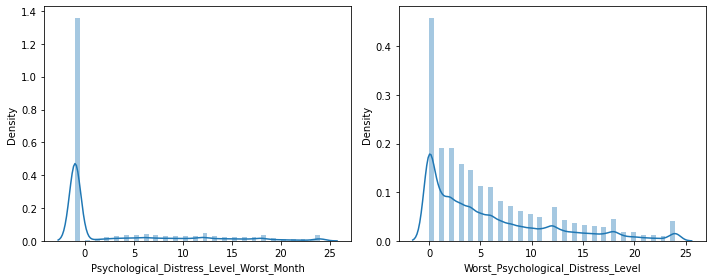

In [30]:
fig = plt.figure(1, (10, 4))

ax = plt.subplot(1,2,1)
sns.distplot(df.Psychological_Distress_Level_Worst_Month)
plt.tight_layout()

ax = plt.subplot(1,2,2)
sns.distplot(df.Worst_Psychological_Distress_Level)
plt.tight_layout()

plt.show()

# Multivariate Analysis & Multicollinearity

**Multicollinearity** (or collinearity) occurs when one independent variable in a regression model is linearly correlated with another independent variable.

**Problems That Arise From Multicollinearity**

1. The fitted regression coefficients (beta hat) will change substantially if one of the values of one of the x variables is changed only a bit.

2. The variance of the estimated coefficients will be inflated, which means that it will be hard to detect statistical significance. Furthermore, it’s possible that the F statistic is significant but the individual t statistics are not.

3. Ultimately, multicollinearity makes prediction less accurate. For a given model, the underlying assumption is that the relationships among the predicting variables, as well as their relationship with the target variable, will be the same. However, when multicollinearity is present, this is less likely to be the case.

**How to Detect and Eliminate Multicollinearity** Variance inflation factor or the IVF for each predicting variable. A VIF of 1 (the minimum possible VIF) means the tested predictor is not correlated with the other predictors.A VIF of 1 (the minimum possible VIF) means the tested predictor is not correlated with the other predictors.An acceptable VIF is if it’s less than the max of 10 and 1/1-R²model.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [35]:
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
49,Moderate_Mental_Illness_Indicator_Past_Year,inf
48,Serious_Or_Moderate_Mental_Illness_Indicator_P...,inf
51,Low_Or_Moderate_Mental_Illness_Indicator_Past_...,inf
52,Categorical_Mental_Illness_Indicator,inf
53,Serious_Mental_Illness_And_Substance_Abuse,inf
54,Any_Mental_Illness_And_Substance_Abuse,inf
55,Low_Or_Moderate_Mental_Illness_And_Substance_A...,inf
50,Mild_Mental_Illness_Indicator_Past_Year,inf
19,Rehab_Paid,2839.815329
62,Age_Category_Three_Levels,908.879011


In [37]:
X2 = X.drop(['Moderate_Mental_Illness_Indicator_Past_Year', 
            'Serious_Or_Moderate_Mental_Illness_Indicator_Past_Year', 
            'Low_Or_Moderate_Mental_Illness_Indicator_Past_Year', 
            'Categorical_Mental_Illness_Indicator',
            'Serious_Mental_Illness_And_Substance_Abuse', 
            'Low_Or_Moderate_Mental_Illness_And_Substance_Abuse',
            'Mild_Mental_Illness_Indicator_Past_Year', 
            'Self_Paid', 
            'Private_Health_Insurance_Paid',
            'Medicare_Paid',
            'Medicaid_Paid',
            'Rehab_Paid',
            'Employer_Paid',
            'Military_Paid',
            'Other_Public_Source_Paid',
            'Other_Private_Source_Paid',
            'Non_Household_Member_Paid',
            'Age_Category',
            'Gender_Age_Category',
            'Race_Sex'], axis=1)
vif_data2 = pd.DataFrame()
vif_data2["feature"] = X2.columns
vif_data2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(len(X2.columns))]
vif_data2.sort_values(by='VIF', ascending=False)

,feature,VIF
44,Age_Category_Three_Levels,674.884879
45,Age_Category_Six_Levels,618.318570
0,Year,491.977194
28,No_Treatment_No_Transport_Inconvenient,221.701541
27,No_Treatment_Didnt_Want_Others_To_Know,190.078908
18,No_Treatment_Insurance_Not_Covered,177.270193
21,No_Treatment_Confidentiality_Concerns,151.713451
17,No_Treatment_Feared_Effect_On_Job,150.273451
25,No_Treatment_Didnt_Think_Would_Help,146.861873
23,No_Treatment_Didnt_Think_Needed,138.341732


In [38]:
vif_data2.sort_values(by='VIF', ascending=False)

,feature,VIF
44,Age_Category_Three_Levels,674.884879
45,Age_Category_Six_Levels,618.318570
0,Year,491.977194
28,No_Treatment_No_Transport_Inconvenient,221.701541
27,No_Treatment_Didnt_Want_Others_To_Know,190.078908
18,No_Treatment_Insurance_Not_Covered,177.270193
21,No_Treatment_Confidentiality_Concerns,151.713451
17,No_Treatment_Feared_Effect_On_Job,150.273451
25,No_Treatment_Didnt_Think_Would_Help,146.861873
23,No_Treatment_Didnt_Think_Needed,138.341732


In [40]:
X3 = X2.drop(['No_Treatment_No_Transport_Inconvenient',
             'No_Treatment_Confidentiality_Concerns',
             'No_Treatment_Didnt_Think_Needed',
             'No_Treatment_Other',
             'No_Treatment_Feared_Neighbors_Opinion',
             'No_Treatment_Insurance_Not_Covered_Enough',
             'No_Treatment_Fear_Of_Being_Committed',
             'No_Treatment_Handle_Problem_Without',
             'No_Treatment_Where_To_Go'], axis=1)
vif_data3 = pd.DataFrame()
vif_data3["feature"] = X3.columns
vif_data3["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(len(X3.columns))]
vif_data3.sort_values(by='VIF', ascending=False)

,feature,VIF
35,Age_Category_Three_Levels,674.817039
36,Age_Category_Six_Levels,618.262830
0,Year,445.656116
17,No_Treatment_Insurance_Not_Covered,159.360966
20,No_Treatment_Didnt_Want_Others_To_Know,157.901830
34,Age_Category_Two_Levels,125.704599
16,No_Treatment_Feared_Effect_On_Job,125.563652
18,No_Treatment_Didnt_Think_Would_Help,124.498575
58,Total_Income_Family,118.360923
14,Nobody_Paid,115.500583


In [41]:
X4 = X3.drop(['No_Treatment_Insurance_Not_Covered',
              'No_Treatment_Feared_Effect_On_Job',
              'Total_Income_Family_Recode',
              'Covered_By_Any_Health_Insurance',
              'Has_Medicare',
              'Has_Private_Health_Insurance',
              'Has_Other_Health_Insurance',
              'Has_Medicaid_Or_CHIP',
              'Has_Military_Benefit'], axis=1)
vif_data4 = pd.DataFrame()
vif_data4["feature"] = X4.columns
vif_data4["VIF"] = [variance_inflation_factor(X4.values, i) for i in range(len(X4.columns))]
vif_data4.sort_values(by='VIF', ascending=False)

,feature,VIF
33,Age_Category_Three_Levels,427.347571
0,Year,387.715665
34,Age_Category_Six_Levels,334.303649
18,No_Treatment_Didnt_Want_Others_To_Know,150.076819
32,Age_Category_Two_Levels,124.768553
16,No_Treatment_Didnt_Think_Would_Help,122.335863
14,Nobody_Paid,115.475844
17,No_Treatment_Didnt_Have_Time,75.786948
5,Treatment_Type_Past_Year,58.969263
15,No_Treatment_Could_Not_Afford,43.941410


In [43]:
X5 = X4.drop(['No_Treatment_Could_Not_Afford',
              'Age_Category_Three_Levels',
              'Age_Category_Two_Levels',
              'Received_Treatment_At_Clinic_Or_Center',
              'Received_Treatment_At_Medical_Clinic',
              'Received_Treatment_At_NonClinic_Doctor',
              'Received_Treatment_At_Private_Therapist',
              'Received_Treatment_Other',
              'Received_Treatment_At_Day_Hospital',
              'Received_Treatment_At_School'], axis=1)
vif_data5 = pd.DataFrame()
vif_data5["feature"] = X5.columns
vif_data5["VIF"] = [variance_inflation_factor(X5.values, i) for i in range(len(X5.columns))]
vif_data5.sort_values(by='VIF', ascending=False)

,feature,VIF
0,Year,318.475128
10,No_Treatment_Didnt_Want_Others_To_Know,146.855750
8,No_Treatment_Didnt_Think_Would_Help,121.845985
7,Nobody_Paid,98.922275
9,No_Treatment_Didnt_Have_Time,75.727551
5,Treatment_Type_Past_Year,43.980486
42,Poverty_Level,34.603643
43,PDEN10,33.489416
3,Prescription_Treatment_Past_Year,33.122624
31,Adult_Employment_Status,30.789188


In [44]:
X6  = X5.drop(['No_Treatment_Didnt_Want_Others_To_Know',
               'No_Treatment_Didnt_Think_Would_Help',
               'No_Treatment_Didnt_Have_Time',
               'Any_Treatment_Past_Year',
               'Outpatient_Past_Year', 
               'Work_Situation_Past_Week', 
               'Prescription_Treatment_Past_Year',
               'Adult_Lifetime_Major_Depressive_Episode', 
               'Family_Receives_Food_Stamps',
               'Suicide_Attempt_Past_Year'], axis=1)
vif_data6 = pd.DataFrame()
vif_data6["feature"] = X6.columns
vif_data6["VIF"] = [variance_inflation_factor(X6.values, i) for i in range(len(X6.columns))]
vif_data6.sort_values(by='VIF', ascending=False)

,feature,VIF
0,Year,95.983133
32,Poverty_Level,34.466838
33,PDEN10,33.488094
30,Total_Income_Family,26.476951
34,County_Metro_NonMetro_Status,25.803922
4,Nobody_Paid,23.177389
16,Age_Category_Six_Levels,14.465090
18,Education_Category,12.291211
15,Gender,11.677864
22,Adult_Employment_Status,10.182991


In [45]:
X7  = X6.drop(['Poverty_Level', 
               'Year', 
               'Worst_Psychological_Distress_Level', 
               'Family_Receives_Welfare_JobPlacement_Childcare',
               'Psychological_Distress_Level_Worst_Month', 
               'Family_Receives_Social_Security', 
               'County_Metro_NonMetro_Status',
               'Total_Income_Family', 
               'Serious_Suicidal_Thoughts_Past_Year', 
               'Nobody_Paid', 
               'Adult_Received_Counseling_Or_Meds_For_Depressive_Feelings_Past_Year',
               'Family_Receives_SSI', 
               'Months_On_Welfare'], axis=1)
vif_data7 = pd.DataFrame()
vif_data7["feature"] = X7.columns
vif_data7["VIF"] = [variance_inflation_factor(X7.values, i) for i in range(len(X7.columns))]
vif_data7.sort_values(by='VIF', ascending=False)

,feature,VIF
10,Age_Category_Six_Levels,11.546690
12,Education_Category,10.499930
9,Gender,10.021302
16,Adult_Employment_Status,9.178045
17,Covered_By_Any_Health_Insurance_Imputation_Rev...,8.556388
13,Overall_Health,7.263954
21,PDEN10,6.870541
19,Total_Income_Respondent,6.402996
15,EAP_Offered,2.490817
11,Race_Ethnicity,2.134157


In [46]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [47]:
# print out the linear correlation coefficients for each pair of variables in your data set, 
# in order of the correlation coefficient. 
# This lets you see very easily which pair of variables are most highly correlated.
mosthighlycorrelated(X7, 5) 

,FirstVariable,SecondVariable,Correlation
0,EAP_Offered,Adult_Employment_Status,-0.764911
1,Serious_Psychological_Distress_Indicator_Past_...,Adult_Past_Year_Major_Depressive_Episode,0.476840
2,Num_Weeks_Mental_Health_Difficulties,Serious_Psychological_Distress_Indicator_Past_...,0.452741
3,Num_Weeks_Mental_Health_Difficulties,Adult_Past_Year_Major_Depressive_Episode,0.433599
4,Adult_Employment_Status,Total_Income_Respondent,-0.431862


In [48]:
X8  = X7.drop(['EAP_Offered'], axis=1)
vif_data8 = pd.DataFrame()
vif_data8["feature"] = X8.columns
vif_data8["VIF"] = [variance_inflation_factor(X8.values, i) for i in range(len(X8.columns))]
vif_data8.sort_values(by='VIF', ascending=False)

,feature,VIF
10,Age_Category_Six_Levels,11.536230
12,Education_Category,10.360093
9,Gender,9.974041
16,Covered_By_Any_Health_Insurance_Imputation_Rev...,8.451217
13,Overall_Health,7.249676
20,PDEN10,6.820249
18,Total_Income_Respondent,6.285201
15,Adult_Employment_Status,4.973914
11,Race_Ethnicity,2.132602
5,Serious_Psychological_Distress_Indicator_Past_...,1.945589


In [50]:
mosthighlycorrelated(X8, 5) 

,FirstVariable,SecondVariable,Correlation
0,Serious_Psychological_Distress_Indicator_Past_...,Adult_Past_Year_Major_Depressive_Episode,0.476840
1,Num_Weeks_Mental_Health_Difficulties,Serious_Psychological_Distress_Indicator_Past_...,0.452741
2,Num_Weeks_Mental_Health_Difficulties,Adult_Past_Year_Major_Depressive_Episode,0.433599
3,Adult_Employment_Status,Total_Income_Respondent,-0.431862
4,Education_Category,Total_Income_Respondent,0.422501


In [49]:
X8.shape

(214505, 21)

# Forward selection

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 0)

sfs.fit(X8, y)
sfs.k_feature_names_  

# ('Num_Weeks_Mental_Health_Difficulties',
#  'Num_Days_Past_Year_Unable_To_Work',
#  'Serious_Psychological_Distress_Indicator_Past_Year',
#  'Suicide_Plan_Past_Year',
#  'Gender',
#  'Age_Category_Six_Levels',
#  'Education_Category',
#  'Overall_Health',
#  'Num_Days_Skipped_Work_Past_30_Days',
#  'Total_Income_Respondent')

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

('Num_Weeks_Mental_Health_Difficulties',
 'Num_Days_Past_Year_Unable_To_Work',
 'Serious_Psychological_Distress_Indicator_Past_Year',
 'Suicide_Plan_Past_Year',
 'Gender',
 'Age_Category_Six_Levels',
 'Education_Category',
 'Overall_Health',
 'Num_Days_Skipped_Work_Past_30_Days',
 'Total_Income_Respondent')

# Backward selection

In [52]:
#Sequential backward selection(sbs)
sbs = SFS(LogisticRegression(),
         k_features=10,
         forward=False,
         floating=False,
         scoring = 'accuracy',
         cv=0)
sbs.fit(X8, y)
sbs.k_feature_names_


# ('Perceived_Unmet_Need',
#  'Num_Weeks_Mental_Health_Difficulties',
#  'Serious_Psychological_Distress_Indicator_Past_Year',
#  'Suicide_Plan_Past_Year',
#  'Education_Category',
#  'Overall_Health',
#  'Num_Days_Skipped_Work_Past_30_Days',
#  'Adult_Employment_Status',
#  'Covered_By_Any_Health_Insurance_Imputation_Revised',
#  'Participated_In_One_Or_More_Government_Assistance_Programs')

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

('Perceived_Unmet_Need',
 'Num_Weeks_Mental_Health_Difficulties',
 'Serious_Psychological_Distress_Indicator_Past_Year',
 'Suicide_Plan_Past_Year',
 'Education_Category',
 'Overall_Health',
 'Num_Days_Skipped_Work_Past_30_Days',
 'Adult_Employment_Status',
 'Covered_By_Any_Health_Insurance_Imputation_Revised',
 'Participated_In_One_Or_More_Government_Assistance_Programs')

# Bi-directional elimination (Stepwise Selection)

In [53]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(LogisticRegression(),
         k_features=(10),
         forward=True,
         floating=True,
         scoring = 'accuracy',
         cv=0)
sffs.fit(X8, y)
sffs.k_feature_names_

# ('Num_Weeks_Mental_Health_Difficulties',
#  'Num_Days_Past_Year_Unable_To_Work',
#  'Serious_Psychological_Distress_Indicator_Past_Year',
#  'Suicide_Plan_Past_Year',
#  'Gender',
#  'Age_Category_Six_Levels',
#  'Education_Category',
#  'Overall_Health',
#  'Num_Days_Skipped_Work_Past_30_Days',
#  'Total_Income_Respondent')

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chiufengyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

('Num_Weeks_Mental_Health_Difficulties',
 'Num_Days_Past_Year_Unable_To_Work',
 'Serious_Psychological_Distress_Indicator_Past_Year',
 'Suicide_Plan_Past_Year',
 'Gender',
 'Age_Category_Six_Levels',
 'Education_Category',
 'Overall_Health',
 'Num_Days_Skipped_Work_Past_30_Days',
 'Total_Income_Respondent')

## Fit Logistic Regression 

In [56]:
### With all features from X8 (after removing extreme multicolinearities)
res = sm.Logit(y, X8).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.106566
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            Logit Regression Results                                           
===============================================================================================================
Dep. Variable:     Serious_Psychological_Distress_Indicator_Past_Month   No. Observations:               214505
Model:                                                           Logit   Df Residuals:                   214484
Method:                                                            MLE   Df Model:                           20
Date:                                                 Wed, 20 Oct 2021   Pseudo R-squ.:                  0.6221
Time:                                                         10:05:36   Log-Likelihood:                -22859.
converged:                                                        True   LL-Null:                       -60492.
Covariance Type:                                             nonrobust   LLR p-value:                     0.000
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Inpatient_Past_Year                                            0.0265      0.065      0.410      0.682      -0.100       0.153
Treatment_Type_Past_Year                                       0.0278      0.006      4.832      0.000       0.017       0.039
Perceived_Unmet_Need                                           0.4624      0.028     16.599      0.000       0.408       0.517
Num_Weeks_Mental_Health_Difficulties                           0.0336      0.001     31.210      0.000       0.032       0.036
Num_Days_Past_Year_Unable_To_Work                              0.0033      0.000     18.506      0.000       0.003       0.004
Serious_Psychological_Distress_Indicator_Past_Year             5.3811      0.043    124.047      0.000       5.296       5.466
Suicide_Plan_Past_Year                                         0.4024      0.043      9.251      0.000       0.317       0.488
Any_Mental_Illness_And_Substance_Abuse                         0.0629      0.031      2.039      0.041       0.002       0.123
Adult_Past_Year_Major_Depressive_Episode                      -0.0056      0.026     -0.215      0.830      -0.056       0.045
Gender                                                        -0.7943      0.024    -33.046      0.000      -0.841      -0.747
Age_Category_Six_Levels                                       -0.2666      0.013    -20.566      0.000      -0.292      -0.241
Race_Ethnicity                                                -0.0803      0.005    -16.043      0.000      -0.090      -0.070
Education_Category                                            -0.6646      0.014    -47.374      0.000      -0.692      -0.637
Overall_Health                                                 0.0619      0.013      4.726      0.000       0.036       0.088
Num_Days_Skipped_Work_Past_30_Days                             0.0296      0.007      4.423      0.000       0.016       0.043
Adult_Employment_Status                                       -0.1220      0.011    -11.010      0.000      -0.144      -0.100
Covered_By_Any_Health_Insurance_Imputation_Revised            -0.7289      0.035    -21.038      0.000      -0.797      -0.661
Family_Receives_Public_Assistance                              0.0236      0.071      0.330      0.741      -0.116       0.163
Total_Income_Respondent                                       -0.1422      0.009    -16.011      0.000      -0.160      -0.125
Participated_In_One_Or_More_Government_Assistance_Programs     0.1241      0.030      4.151      0.000       0.065       0.183
PDEN10                 

In [57]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                                            5%         95%  \
Inpatient_Past_Year                                   0.904528    1.165782   
Treatment_Type_Past_Year                              1.016682    1.039897   
Perceived_Unmet_Need                                  1.503451    1.676906   
Num_Weeks_Mental_Health_Difficulties                  1.032038    1.036409   
Num_Days_Past_Year_Unable_To_Work                     1.002951    1.003652   
Serious_Psychological_Distress_Indicator_Past_Year  199.552705  236.541317   
Suicide_Plan_Past_Year                                1.373153    1.628415   
Any_Mental_Illness_And_Substance_Abuse                1.002454    1.131274   
Adult_Past_Year_Major_Depressive_Episode              0.945158    1.046294   
Gender                                                0.431085    0.473679   
Age_Category_Six_Levels                               0.746798    0.785720   
Race_Ethnicity                                        0.913881  

In [60]:
### With features selected from forward selection
X8_forward = X8[['Num_Weeks_Mental_Health_Difficulties',
 'Num_Days_Past_Year_Unable_To_Work',
 'Serious_Psychological_Distress_Indicator_Past_Year',
 'Suicide_Plan_Past_Year',
 'Gender',
 'Age_Category_Six_Levels',
 'Education_Category',
 'Overall_Health',
 'Num_Days_Skipped_Work_Past_30_Days',
 'Total_Income_Respondent']]

res_forward = sm.Logit(y, X8_forward).fit()
res_forward.summary()

Optimization terminated successfully.
         Current function value: 0.112933
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            Logit Regression Results                                           
===============================================================================================================
Dep. Variable:     Serious_Psychological_Distress_Indicator_Past_Month   No. Observations:               214505
Model:                                                           Logit   Df Residuals:                   214495
Method:                                                            MLE   Df Model:                            9
Date:                                                 Wed, 20 Oct 2021   Pseudo R-squ.:                  0.5995
Time:                                                         10:10:23   Log-Likelihood:                -24225.
converged:                                                        True   LL-Null:                       -60492.
Covariance Type:                                             nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Num_Weeks_Mental_Health_Difficulties                   0.0411      0.001     40.053      0.000       0.039       0.043
Num_Days_Past_Year_Unable_To_Work                      0.0034      0.000     19.886      0.000       0.003       0.004
Serious_Psychological_Distress_Indicator_Past_Year     5.1241      0.036    140.748      0.000       5.053       5.195
Suicide_Plan_Past_Year                                 0.4801      0.042     11.352      0.000       0.397       0.563
Gender                                                -1.1297      0.022    -51.282      0.000      -1.173      -1.087
Age_Category_Six_Levels                               -0.4226      0.012    -35.395      0.000      -0.446      -0.399
Education_Category                                    -0.7856      0.013    -59.561      0.000      -0.811      -0.760
Overall_Health                                        -0.0947      0.012     -7.748      0.000      -0.119      -0.071
Num_Days_Skipped_Work_Past_30_Days                     0.0425      0.007      6.522      0.000       0.030       0.055
Total_Income_Respondent                               -0.1215      0.008    -14.924      0.000      -0.137      -0.106
======================================================================================================================
"""

In [62]:
params_forward = res_forward.params
conf_forward = res_forward.conf_int()
conf_forward['Odds Ratio'] = params_forward
conf_forward.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf_forward))

                                                            5%         95%  \
Num_Weeks_Mental_Health_Difficulties                  1.039864    1.044055   
Num_Days_Past_Year_Unable_To_Work                     1.003081    1.003756   
Serious_Psychological_Distress_Indicator_Past_Year  156.444200  180.441700   
Suicide_Plan_Past_Year                                1.487706    1.755993   
Gender                                                0.309482    0.337394   
Age_Category_Six_Levels                               0.640164    0.670839   
Education_Category                                    0.444235    0.467806   
Overall_Health                                        0.888077    0.931680   
Num_Days_Skipped_Work_Past_30_Days                    1.030198    1.056873   
Total_Income_Respondent                               0.871615    0.899869   

                                                    Odds Ratio  
Num_Weeks_Mental_Health_Difficulties                  1.041957  
Num_Days_Pa

In [63]:
### With features selected from backward selection

X8_backward = X8[['Perceived_Unmet_Need',
 'Num_Weeks_Mental_Health_Difficulties',
 'Serious_Psychological_Distress_Indicator_Past_Year',
 'Suicide_Plan_Past_Year',
 'Education_Category',
 'Overall_Health',
 'Num_Days_Skipped_Work_Past_30_Days',
 'Adult_Employment_Status',
 'Covered_By_Any_Health_Insurance_Imputation_Revised',
 'Participated_In_One_Or_More_Government_Assistance_Programs']]

res_backward = sm.Logit(y, X8_forward).fit()
res_backward.summary()

Optimization terminated successfully.
         Current function value: 0.112933
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            Logit Regression Results                                           
===============================================================================================================
Dep. Variable:     Serious_Psychological_Distress_Indicator_Past_Month   No. Observations:               214505
Model:                                                           Logit   Df Residuals:                   214495
Method:                                                            MLE   Df Model:                            9
Date:                                                 Wed, 20 Oct 2021   Pseudo R-squ.:                  0.5995
Time:                                                         10:14:26   Log-Likelihood:                -24225.
converged:                                                        True   LL-Null:                       -60492.
Covariance Type:                                             nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Num_Weeks_Mental_Health_Difficulties                   0.0411      0.001     40.053      0.000       0.039       0.043
Num_Days_Past_Year_Unable_To_Work                      0.0034      0.000     19.886      0.000       0.003       0.004
Serious_Psychological_Distress_Indicator_Past_Year     5.1241      0.036    140.748      0.000       5.053       5.195
Suicide_Plan_Past_Year                                 0.4801      0.042     11.352      0.000       0.397       0.563
Gender                                                -1.1297      0.022    -51.282      0.000      -1.173      -1.087
Age_Category_Six_Levels                               -0.4226      0.012    -35.395      0.000      -0.446      -0.399
Education_Category                                    -0.7856      0.013    -59.561      0.000      -0.811      -0.760
Overall_Health                                        -0.0947      0.012     -7.748      0.000      -0.119      -0.071
Num_Days_Skipped_Work_Past_30_Days                     0.0425      0.007      6.522      0.000       0.030       0.055
Total_Income_Respondent                               -0.1215      0.008    -14.924      0.000      -0.137      -0.106
======================================================================================================================
"""

In [64]:
params_backward = res_backward.params
conf_backward = res_backward.conf_int()
conf_backward['Odds Ratio'] = params_backward
conf_backward.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf_backward))

                                                            5%         95%  \
Num_Weeks_Mental_Health_Difficulties                  1.039864    1.044055   
Num_Days_Past_Year_Unable_To_Work                     1.003081    1.003756   
Serious_Psychological_Distress_Indicator_Past_Year  156.444200  180.441700   
Suicide_Plan_Past_Year                                1.487706    1.755993   
Gender                                                0.309482    0.337394   
Age_Category_Six_Levels                               0.640164    0.670839   
Education_Category                                    0.444235    0.467806   
Overall_Health                                        0.888077    0.931680   
Num_Days_Skipped_Work_Past_30_Days                    1.030198    1.056873   
Total_Income_Respondent                               0.871615    0.899869   

                                                    Odds Ratio  
Num_Weeks_Mental_Health_Difficulties                  1.041957  
Num_Days_Pa

In [65]:
### With features selected from stepwise selection

In [66]:
X8_stepwise = X8[['Num_Weeks_Mental_Health_Difficulties',
 'Num_Days_Past_Year_Unable_To_Work',
 'Serious_Psychological_Distress_Indicator_Past_Year',
 'Suicide_Plan_Past_Year',
 'Gender',
 'Age_Category_Six_Levels',
 'Education_Category',
 'Overall_Health',
 'Num_Days_Skipped_Work_Past_30_Days',
 'Total_Income_Respondent']]

res_stepwise = sm.Logit(y, X8_stepwise).fit()
res_stepwise.summary()

Optimization terminated successfully.
         Current function value: 0.112933
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            Logit Regression Results                                           
===============================================================================================================
Dep. Variable:     Serious_Psychological_Distress_Indicator_Past_Month   No. Observations:               214505
Model:                                                           Logit   Df Residuals:                   214495
Method:                                                            MLE   Df Model:                            9
Date:                                                 Wed, 20 Oct 2021   Pseudo R-squ.:                  0.5995
Time:                                                         10:14:34   Log-Likelihood:                -24225.
converged:                                                        True   LL-Null:                       -60492.
Covariance Type:                                             nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Num_Weeks_Mental_Health_Difficulties                   0.0411      0.001     40.053      0.000       0.039       0.043
Num_Days_Past_Year_Unable_To_Work                      0.0034      0.000     19.886      0.000       0.003       0.004
Serious_Psychological_Distress_Indicator_Past_Year     5.1241      0.036    140.748      0.000       5.053       5.195
Suicide_Plan_Past_Year                                 0.4801      0.042     11.352      0.000       0.397       0.563
Gender                                                -1.1297      0.022    -51.282      0.000      -1.173      -1.087
Age_Category_Six_Levels                               -0.4226      0.012    -35.395      0.000      -0.446      -0.399
Education_Category                                    -0.7856      0.013    -59.561      0.000      -0.811      -0.760
Overall_Health                                        -0.0947      0.012     -7.748      0.000      -0.119      -0.071
Num_Days_Skipped_Work_Past_30_Days                     0.0425      0.007      6.522      0.000       0.030       0.055
Total_Income_Respondent                               -0.1215      0.008    -14.924      0.000      -0.137      -0.106
======================================================================================================================
"""

In [67]:
params_stepwise = res_stepwise.params
conf_stepwise = res_stepwise.conf_int()
conf_stepwise['Odds Ratio'] = params_stepwise
conf_stepwise.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf_stepwise))

                                                            5%         95%  \
Num_Weeks_Mental_Health_Difficulties                  1.039864    1.044055   
Num_Days_Past_Year_Unable_To_Work                     1.003081    1.003756   
Serious_Psychological_Distress_Indicator_Past_Year  156.444200  180.441700   
Suicide_Plan_Past_Year                                1.487706    1.755993   
Gender                                                0.309482    0.337394   
Age_Category_Six_Levels                               0.640164    0.670839   
Education_Category                                    0.444235    0.467806   
Overall_Health                                        0.888077    0.931680   
Num_Days_Skipped_Work_Past_30_Days                    1.030198    1.056873   
Total_Income_Respondent                               0.871615    0.899869   

                                                    Odds Ratio  
Num_Weeks_Mental_Health_Difficulties                  1.041957  
Num_Days_Pa